# Tu primer árbol de decisión con scikit-learn

In [1]:
#Importamos las librerías principales
import pandas as pd
import matplotlib.pyplot as plt

Utilizaremos el **dataset Titanic** de Stanford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [3]:
#Cargamos dataset a utilizar
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Exploración de datos

In [4]:
#Visualización del DataFrame
df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [5]:
#Eliminamos las columnas que no nos interesan
df = df.drop(['Name', 'Fare'], axis=1)

In [6]:
#Renombramos las columnas
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [7]:
#Analizamos el shape del objeto
df.shape

(887, 6)

In [8]:
#Visualizamos los tipos de datos
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [9]:
#Cambiamos los tipos de datos
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [10]:
df.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Sex_male      uint8
dtype: object

In [11]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [12]:
#Reemplazar el DataFrame
df.rename(columns={'Sex_male': 'Sex'}, inplace=True)

In [13]:
#Ordenar columnas por nombres
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Entrenamiento de árbol de decisión con scikit-learn

In [14]:
#Separamos en X e y
X = df.drop('Survived', axis=1)
y = df['Survived']

In [15]:
#Importamos las librerías necesarias para la creación del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=00000)

In [16]:
#Árbol de Decision
from sklearn.tree import DecisionTreeClassifier

#Creación del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=00000)

In [17]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Evaluación del modelo

In [19]:
#Calculo de las predicciones en Train y Test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [20]:
#Calculo de métricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

#Imprimo los resultados
print(f'''
Train Accuracy: {train_accuracy}
 Test Accuracy: {test_accuracy}
''')


Train Accuracy: 0.8048387096774193
 Test Accuracy: 0.7640449438202247



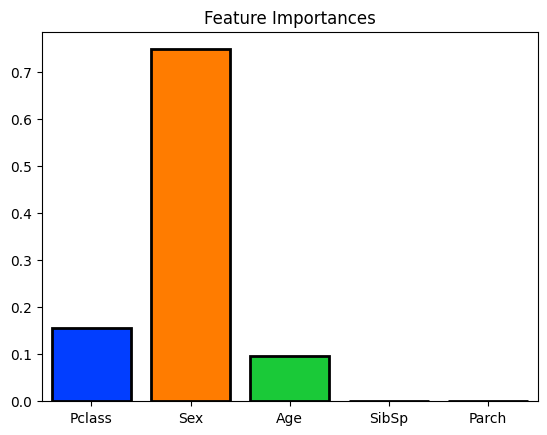

In [24]:
#Verificamos el feature importances
import seaborn as sns
importances = pd.Series(tree.feature_importances_, index=X.columns)
sns.barplot(
    x=importances.index,
    y=importances,
    palette='bright',
    saturation=2,
    edgecolor='black',
    linewidth=2
)
plt.title('Feature Importances');

**¿Que podemos llevarnos de este ejemplo?**

Podemos observar que para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Pclass y luego de Age. También es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo. 